<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/DryBean_Banking_Car_Classification_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# LOGISTIC REGRESSION for 3 datasets Dry Bean Dataset Classification, Banking Dataset Classification
# and Car Acceptability Classification Dataset

# 1. Setup and Data Preparation
# We will start by importing the necessary libraries and loading the datasets.
# The datasets are hosted on Kaggle, so we will download them first.
# 1.1 Install Required Libraries

!pip install seaborn pandas matplotlib scikit-learn


In [73]:
# 1.2 Import Libraries

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [74]:
# 1.3 Load the Datasets
# For each dataset, we'll load them into pandas DataFrames.

# Load the Dry Bean Dataset
#url_dry_bean = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/Dry_Bean_Dataset.csv"
dry_bean_df = pd.read_csv('/content/Dry_Bean_Dataset.csv')

# Load the Banking Dataset
#url_banking = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/Banking.csv"
banking_df = pd.read_csv('/content/new_train.csv')

# Load the Car Acceptability Dataset
#url_car = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/Car_Acceptability.csv"
car_df = pd.read_csv('/content/car.csv')

# Display the first few rows of each dataset
print("Dry Bean Dataset")
print(dry_bean_df.head())

print("\nBanking Dataset")
print(banking_df.head())

print("\nCar Acceptability Dataset")
print(car_df.head())


Dry Bean Dataset
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.91335

In [75]:
# 2. Data Exploration
# We will analyze the structure of the data to understand the features, their types,
# and check for any missing values.

# Explore the structure of each dataset
print("Dry Bean Dataset Info")
print(dry_bean_df.info())

print("\nBanking Dataset Info")
print(banking_df.info())

print("\nCar Acceptability Dataset Info")
print(car_df.info())

# Check for missing values
print("\nDry Bean Missing Values")
print(dry_bean_df.isnull().sum())

print("\nBanking Missing Values")
print(banking_df.isnull().sum())

print("\nCar Acceptability Missing Values")
print(car_df.isnull().sum())


Dry Bean Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  obj

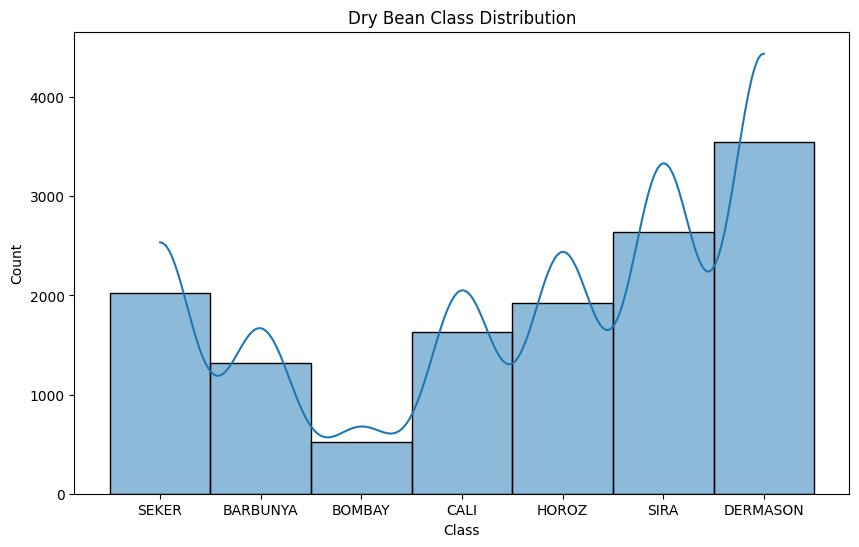

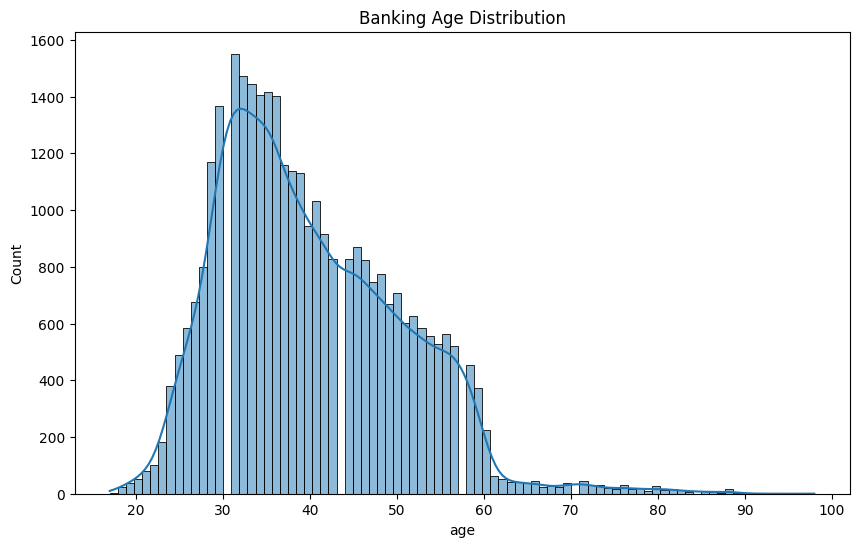

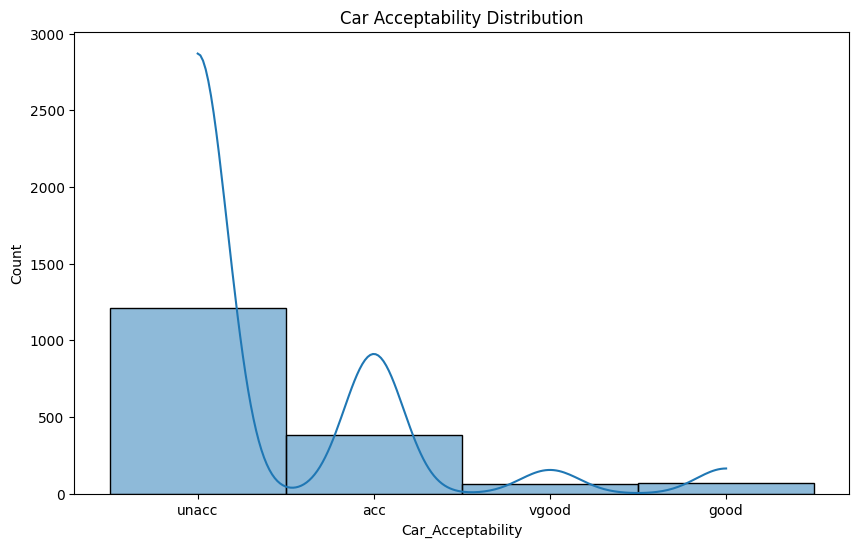

In [76]:
# 2.1 Visualize Data Distributions
# We will use histograms to visualize the distribution of key features.

# Dry Bean dataset feature distribution
plt.figure(figsize=(10,6))
sns.histplot(dry_bean_df['Class'], kde=True)
plt.title('Dry Bean Class Distribution')
plt.show()

# Banking dataset feature distribution
plt.figure(figsize=(10,6))
sns.histplot(banking_df['age'], kde=True)
plt.title('Banking Age Distribution')
plt.show()


# Car Acceptability dataset feature distribution
# Car Acceptability dataset feature distribution
plt.figure(figsize=(10,6))
sns.histplot(car_df['Car_Acceptability'], kde=True)
plt.title('Car Acceptability Distribution')
plt.show()


In [78]:
# 3. Data Preprocessing
# Handle Missing Values and Encode Categorical Data
# We will check and handle missing values and encode categorical variables if necessary.
# 3.1 Encoding Categorical Variables

# Encode categorical variables in the datasets
label_encoder = LabelEncoder()

# Dry Bean dataset encoding
dry_bean_df['Class'] = label_encoder.fit_transform(dry_bean_df['Class'])


# Banking dataset encoding
# Encode the target column ('y') into numeric values (0 or 1)
banking_df['y'] = label_encoder.fit_transform(banking_df['y'])

# Car Acceptability dataset encoding
car_df['Car_Acceptability'] = label_encoder.fit_transform(car_df['Car_Acceptability'])


In [79]:
# 3.2 Splitting Data into Training and Testing Sets

# Dry Bean Dataset Split
X_dry_bean = dry_bean_df.drop('Class', axis=1)
y_dry_bean = dry_bean_df['Class']
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_dry_bean, y_dry_bean, test_size=0.3, random_state=42)

# Banking Dataset Split
X_banking = banking_df.drop('y', axis=1)
y_banking = banking_df['y']
X_train_bk, X_test_bk, y_train_bk, y_test_bk = train_test_split(X_banking, y_banking, test_size=0.3, random_state=42)

# Car Acceptability Dataset Split
X_car = car_df.drop('Car_Acceptability', axis=1)
y_car = car_df['Car_Acceptability']
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.3, random_state=42)


In [80]:
# 4. Logistic Regression Model
# Now, we will build the logistic regression model for each dataset and train it.

# Logistic Regression Model for Dry Bean Dataset
log_reg_db = LogisticRegression(max_iter=1000)
log_reg_db.fit(X_train_db, y_train_db)
y_pred_db = log_reg_db.predict(X_test_db)


# Logistic Regression Model for Banking Dataset
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import StandardScaler here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Encode categorical variables using One-Hot Encoding and Label Encoding
label_encoder = LabelEncoder()
banking_df['y'] = label_encoder.fit_transform(banking_df['y'])  # Target variable encoding

# One-Hot Encode the categorical features (e.g., job, education, etc.)
banking_df_encoded = pd.get_dummies(banking_df, drop_first=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_banking_scaled = scaler.fit_transform(banking_df_encoded.drop('y', axis=1))  # Scale features

# Split the data into training and testing sets
X_train_bk, X_test_bk, y_train_bk, y_test_bk = train_test_split(X_banking_scaled, banking_df_encoded['y'], test_size=0.3, random_state=42)

# Logistic Regression Model with max_iter increased
log_reg_bk = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
log_reg_bk.fit(X_train_bk, y_train_bk)  # Fit the model

# Predicting the target variable for the test set
y_pred_bk = log_reg_bk.predict(X_test_bk)  # Make predictions

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_bk, y_pred_bk))
print("Classification Report:\n", classification_report(y_test_bk, y_pred_bk))
print("Confusion Matrix:\n", confusion_matrix(y_test_bk, y_pred_bk))
print("ROC-AUC:", roc_auc_score(y_test_bk, y_pred_bk))


# Logistic Regression Model for Car Acceptability Dataset
# One-Hot Encoding for categorical columns (drop the first to avoid multicollinearity)
car_df_encoded = pd.get_dummies(car_df, drop_first=True)

# Label encode the target variable 'Car_Acceptability' (multi-class outcome)
label_encoder = LabelEncoder()
car_df_encoded['Car_Acceptability'] = label_encoder.fit_transform(car_df_encoded['Car_Acceptability'])

# Split the data into features (X) and target (y)
X_car = car_df_encoded.drop('Car_Acceptability', axis=1)
y_car = car_df_encoded['Car_Acceptability']

# Split the data into training and testing sets
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_car_scaled = scaler.fit_transform(X_train_car)  # Fit and transform on training data
X_test_car_scaled = scaler.transform(X_test_car)  # Transform on testing data

# Logistic Regression Model for Car Acceptability Dataset
log_reg_car = LogisticRegression(max_iter=1000, solver='liblinear')  # Use solver 'liblinear' for better convergence
log_reg_car.fit(X_train_car_scaled, y_train_car)  # Fit the model

# Predicting the target variable for the test set
y_pred_car = log_reg_car.predict(X_test_car_scaled)  # Make predictions

# Evaluate the model
print("Car Acceptability Model Accuracy:", accuracy_score(y_test_car, y_pred_car))
print("Classification Report:\n", classification_report(y_test_car, y_pred_car))
print("Confusion Matrix:\n", confusion_matrix(y_test_car, y_pred_car))

# For multi-class ROC-AUC, use the probability estimates
y_pred_proba_car = log_reg_car.predict_proba(X_test_car_scaled)

# Compute the ROC-AUC for multi-class classification (One-vs-Rest approach)
roc_auc = roc_auc_score(y_test_car, y_pred_proba_car, multi_class='ovr', average='macro')
print("ROC-AUC:", roc_auc)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9056145675265553
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8723
           1       0.68      0.38      0.49      1162

    accuracy                           0.91      9885
   macro avg       0.80      0.68      0.72      9885
weighted avg       0.89      0.91      0.89      9885

Confusion Matrix:
 [[8511  212]
 [ 721  441]]
ROC-AUC: 0.6776072535009925
Car Acceptability Model Accuracy: 0.8805394990366089
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       118
           1       0.38      0.26      0.31        19
           2       0.96      0.97      0.96       358
           3       1.00      0.38      0.55        24

    accuracy                           0.88       519
   macro avg       0.76      0.61      0.65       519
weighted avg       0.88      0.88      0.87       519

Confusion Matrix:
 [[ 96   7  15  

In [81]:
# 5. Model Evaluation for all 3 models
# We will evaluate the models using various metrics such as accuracy, precision, recall,
# F1-score, and ROC-AUC.

# Evaluate the Dry Bean Model
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Encode categorical variables using One-Hot Encoding for multi-category columns (if any)
dry_bean_df_encoded = pd.get_dummies(dry_bean_df, drop_first=True)

# Split the data into features (X) and target (y)
X_dry_bean = dry_bean_df_encoded.drop('Class', axis=1)
y_dry_bean = dry_bean_df_encoded['Class']

# Split the data into training and testing sets
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_dry_bean, y_dry_bean, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_db_scaled = scaler.fit_transform(X_train_db)  # Fit and transform on training data
X_test_db_scaled = scaler.transform(X_test_db)  # Transform on testing data

# Logistic Regression Model for Dry Bean Dataset
log_reg_db = LogisticRegression(max_iter=1000, solver='liblinear')  # Use solver 'liblinear' for better convergence
log_reg_db.fit(X_train_db_scaled, y_train_db)  # Fit the model

# Make predictions
y_pred_db = log_reg_db.predict(X_test_db_scaled)

# Evaluate the model
print("Dry Bean Model Accuracy:", accuracy_score(y_test_db, y_pred_db))
print("Classification Report:\n", classification_report(y_test_db, y_pred_db))
print("Confusion Matrix:\n", confusion_matrix(y_test_db, y_pred_db))

# For multi-class ROC-AUC, use the probability estimates
y_pred_proba_db = log_reg_db.predict_proba(X_test_db_scaled)

# Compute the ROC-AUC for multi-class classification (One-vs-Rest approach)
roc_auc_db = roc_auc_score(y_test_db, y_pred_proba_db, multi_class='ovr', average='macro')
print("ROC-AUC:", roc_auc_db)


# Evaluate the Banking Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Logistic Regression Model for Banking Dataset
log_reg_bk = LogisticRegression(max_iter=1000, solver='liblinear')  # Use solver 'liblinear' for better convergence
log_reg_bk.fit(X_train_bk_scaled, y_train_bk)  # Fit the model

# Make predictions
y_pred_bk = log_reg_bk.predict(X_test_bk_scaled)

# Evaluate the model
print("Banking Model Accuracy:", accuracy_score(y_test_bk, y_pred_bk))
print("Classification Report:\n", classification_report(y_test_bk, y_pred_bk))
print("Confusion Matrix:\n", confusion_matrix(y_test_bk, y_pred_bk))

# For multi-class ROC-AUC, use the probability estimates
y_pred_proba_bk = log_reg_bk.predict_proba(X_test_bk_scaled)

# Extract probability for class '1' (binary classification)
y_pred_proba_bk_class_1 = y_pred_proba_bk[:, 1]  # This gets the probabilities of class 1

# Ensure y_test_bk is in 1D format (not one-hot encoded)
if len(y_test_bk.shape) > 1:
    # Flatten y_test_bk from 2D to 1D if it's one-hot encoded
    y_test_bk = np.argmax(y_test_bk, axis=1)  # Convert from one-hot encoded to class labels

# Now y_test_bk should be 1D, and we can compute ROC-AUC
print("y_test_bk shape after flattening:", y_test_bk.shape)

# Compute the ROC-AUC for binary classification
roc_auc_bk = roc_auc_score(y_test_bk, y_pred_proba_bk_class_1)  # Use probabilities for class '1'
print("ROC-AUC:", roc_auc_bk)


# Evaluate the Car Acceptability Model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# One-Hot Encoding for categorical columns (drop the first to avoid multicollinearity)
car_df_encoded = pd.get_dummies(car_df, drop_first=True)

# Label encode the target variable 'Car_Acceptability' (multi-class outcome)
label_encoder = LabelEncoder()
car_df_encoded['Car_Acceptability'] = label_encoder.fit_transform(car_df_encoded['Car_Acceptability'])

# Split the data into features (X) and target (y)
X_car = car_df_encoded.drop('Car_Acceptability', axis=1)
y_car = car_df_encoded['Car_Acceptability']

# Split the data into training and testing sets
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car, y_car, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_car_scaled = scaler.fit_transform(X_train_car)  # Fit and transform on training data
X_test_car_scaled = scaler.transform(X_test_car)  # Transform on testing data

# Logistic Regression Model for Car Acceptability Dataset
log_reg_car = LogisticRegression(max_iter=1000, solver='liblinear')  # Use solver 'liblinear' for better convergence
log_reg_car.fit(X_train_car_scaled, y_train_car)  # Fit the model

# Make predictions
y_pred_car = log_reg_car.predict(X_test_car_scaled)

# Evaluate the model
print("Car Acceptability Model Accuracy:", accuracy_score(y_test_car, y_pred_car))
print("Classification Report:\n", classification_report(y_test_car, y_pred_car))
print("Confusion Matrix:\n", confusion_matrix(y_test_car, y_pred_car))

# For multi-class ROC-AUC, use the probability estimates
y_pred_proba_car = log_reg_car.predict_proba(X_test_car_scaled)

# Compute the ROC-AUC for multi-class classification (One-vs-Rest approach)
roc_auc_car = roc_auc_score(y_test_car, y_pred_proba_car, multi_class='ovr', average='macro')
print("ROC-AUC:", roc_auc_car)


Dry Bean Model Accuracy: 0.9179725759059746
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       395
           1       1.00      1.00      1.00       161
           2       0.93      0.93      0.93       479
           3       0.93      0.89      0.91      1043
           4       0.97      0.95      0.96       588
           5       0.96      0.94      0.95       619
           6       0.81      0.91      0.86       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

Confusion Matrix:
 [[352   0  25   0   1   2  15]
 [  0 161   0   0   0   0   0]
 [ 12   0 445   0   8   1  13]
 [  0   0   0 926   1  17  99]
 [  3   0   5   6 556   0  18]
 [  6   0   0  11   0 579  23]
 [  3   0   1  54   6   5 730]]
ROC-AUC: 0.9940096453513946
Banking Model Accuracy: 0.9053110773899848
Classification Report:
    

In [82]:
# 6. Hyperparameter Tuning and Model Optimization
# We will perform hyperparameter tuning using GridSearchCV to optimize the logistic regression models.

# Hyperparameter Tuning for Dry Bean Dataset using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search_db = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search_db.fit(X_train_db, y_train_db)
print("\nBest Parameters for Dry Bean:", grid_search_db.best_params_)

# Hyperparameter Tuning for Banking Dataset using GridSearchCV
grid_search_bk = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search_bk.fit(X_train_bk, y_train_bk)
print("\nBest Parameters for Banking:", grid_search_bk.best_params_)

# Hyperparameter Tuning for Car Acceptability Dataset using GridSearchCV
grid_search_car = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1)
grid_search_car.fit(X_train_car, y_train_car)
print("\nBest Parameters for Car Acceptability:", grid_search_car.best_params_)



Best Parameters for Dry Bean: {'C': 0.1, 'solver': 'liblinear'}

Best Parameters for Banking: {'C': 0.01, 'solver': 'liblinear'}

Best Parameters for Car Acceptability: {'C': 10, 'solver': 'saga'}
